In [1]:
import pandas as pd
import psycopg2 as pg
import pickle
import numpy as np
# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('fivethirtyeight')
from collections import OrderedDict 

%matplotlib inline

%pylab inline
%config InLineBackend.figure_formats=['retina']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

Populating the interactive namespace from numpy and matplotlib


In [2]:
connection_args = {
    'host': '3.17.201.157',  # You will need to put the PUBLIC IP address of your AWS instance here
    'user': 'ubuntu',    # your username on AWS is 'ubuntu'
    'dbname': 'instacart',    # DB that we are connecting to
    'port': 5432             # port we opened on AWS
}
connection = pg.connect(**connection_args)

OperationalError: could not connect to server: Operation timed out
	Is the server running on host "3.17.201.157" and accepting
	TCP/IP connections on port 5432?


In [ ]:
cursor = connection.cursor()

In [ ]:
cursor.execute('SELECT * FROM orders')
new_list = list(cursor.fetchall())

In [ ]:
orderdf = pd.DataFrame(new_list)

In [ ]:
orderdf.head()

In [ ]:
orderdf.columns=["order_id","user_id","eval_set","order_number", "order_dow","order_hour_of_day","days_since_prior_order"]

In [ ]:
orderdf.head()

In [ ]:
orderdf.info()

In [ ]:
orderdf['order_id'] = orderdf['order_id'].astype(int)

In [ ]:
orderdf['order_number'] = orderdf['order_number'].astype(int)

In [ ]:
orderdf['user_id'] = orderdf['user_id'].astype(int)

In [ ]:
orderdf['order_dow'] = orderdf['order_dow'].astype(int)

In [ ]:
orderdf['order_hour_of_day'] = orderdf['order_hour_of_day'].astype(int)

In [ ]:
orderdf=orderdf.fillna(30)

In [ ]:
orderdf['days_since_prior_order'] = orderdf['days_since_prior_order'].astype(float)

In [ ]:
orderdf.info()

In [3]:
#with open('orderdf.pkl', 'wb') as picklefile:
 #     pickle.dump(orderdf, picklefile)
with open("orderdf.pkl", 'rb') as picklefile: 
      orderdf = pickle.load(picklefile)

In [ ]:
orderdf.info()

In [ ]:
cursor.execute('SELECT * FROM order_products_prior LIMIT 1048576')
order_products_prior = list(cursor.fetchall())

In [ ]:
#order_products_list

In [ ]:
df_orderproductsprior = pd.DataFrame(order_products_prior)

In [ ]:
df_orderproductsprior.head()

In [ ]:
df_orderproductsprior.columns=['order_id','product_id','add_to_cart_order','reordered']

In [ ]:
df_orderproductsprior['order_id'] = df_orderproductsprior['order_id'].astype(int)

In [ ]:
df_orderproductsprior['product_id'] = df_orderproductsprior['product_id'].astype(int)

In [ ]:
df_orderproductsprior['add_to_cart_order'] = df_orderproductsprior['add_to_cart_order'].astype(int)

In [ ]:
df_orderproductsprior['reordered'] = df_orderproductsprior['reordered'].astype(int)

In [ ]:
df_orderproductsprior.info()

In [4]:
#with open('df_orderproductsprior.pkl', 'wb') as picklefile:
 #    pickle.dump(df_orderproductsprior, picklefile)
with open("df_orderproductsprior.pkl", 'rb') as picklefile: 
      df_orderproductsprior = pickle.load(picklefile)

In [ ]:
df_orderproductsprior.head()

In [ ]:
cursor.execute('SELECT * FROM order_products_train')
order_products_train = list(cursor.fetchall())

In [ ]:
order_products_train

In [ ]:
df_orderproductstrain = pd.DataFrame(order_products_train)

In [ ]:
df_orderproductstrain.head()

In [ ]:
df_orderproductstrain.columns=['order_id','product_id','add_to_cart_order','reordered']

In [ ]:
df_orderproductstrain.head()

In [ ]:
df_orderproductstrain['order_id'] = df_orderproductstrain['order_id'].astype(int)

In [ ]:
df_orderproductstrain['product_id'] = df_orderproductstrain['product_id'].astype(int)

In [ ]:
df_orderproductstrain['add_to_cart_order'] = df_orderproductstrain['add_to_cart_order'].astype(int)

In [ ]:
df_orderproductstrain['reordered'] = df_orderproductstrain['reordered'].astype(int)

In [ ]:
df_orderproductstrain.info()

In [5]:
#with open('df_orderproductstrain.pkl', 'wb') as picklefile:
 #    pickle.dump(df_orderproductstrain, picklefile)
with open("df_orderproductstrain.pkl", 'rb') as picklefile: 
      df_orderproductstrain = pickle.load(picklefile)

In [ ]:
df_orderproductstrain.head()

In [ ]:
cursor.execute('SELECT * FROM aisles')
aisles = list(cursor.fetchall())

In [ ]:
#cursor.execute('rollback;')


In [ ]:
aislesdf = pd.DataFrame(aisles)

In [ ]:
aislesdf.columns=['aisle_id','aisle']

In [ ]:
aislesdf

In [ ]:
aislesdf['aisle_id'] = aislesdf['aisle_id'].astype(int)

In [ ]:
aislesdf.info()

In [6]:
#with open('aislesdf.pkl', 'wb') as picklefile:
 #    pickle.dump(aislesdf, picklefile)
with open("aislesdf.pkl", 'rb') as picklefile: 
      aislesdf = pickle.load(picklefile)

In [ ]:
aislesdf.head()

In [ ]:
cursor.execute('SELECT * FROM departments')
departments = list(cursor.fetchall())

In [ ]:
departmentsdf = pd.DataFrame(departments)

In [ ]:
departmentsdf.columns=['department_id','department']

In [ ]:
departmentsdf.head()

In [ ]:
departmentsdf['department_id'] = departmentsdf['department_id'].astype(int)

In [7]:
#with open('departmentsdf.pkl', 'wb') as picklefile:
 #     pickle.dump(departmentsdf, picklefile)
with open("departmentsdf.pkl", 'rb') as picklefile: 
      departmentsdf = pickle.load(picklefile)

In [ ]:
departmentsdf.head()

In [ ]:
cursor.execute('SELECT * FROM products')
products = list(cursor.fetchall())

In [ ]:
productsdf = pd.DataFrame(products)

In [ ]:
productsdf.columns=['product_id','product_name','aisle_id','department_id']

In [ ]:
productsdf.head()

In [ ]:
productsdf['product_id'] = productsdf['product_id'].astype(int)

In [ ]:
productsdf['aisle_id'] = productsdf['aisle_id'].astype(int)

In [ ]:
productsdf['department_id'] = productsdf['department_id'].astype(int)

In [8]:
#with open('productsdf.pkl', 'wb') as picklefile:
 #     pickle.dump(productsdf, picklefile)
with open("productsdf.pkl", 'rb') as picklefile: 
      productsdf = pickle.load(picklefile)

In [ ]:
productsdf.head()

In [ ]:
productsdf.info()

cursor.execute('SELECT * FROM order_products_prior')
order_products_list = list(cursor.fetchall())

In [ ]:
#order_products_list

##ANALYSIS

In [9]:
df_orderproductstrain = df_orderproductstrain.merge(orderdf.drop('eval_set', axis=1), on='order_id')
df_orderproductsprior = df_orderproductsprior.merge(orderdf.drop('eval_set', axis=1), on='order_id')

df_orderproductstrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 9 columns):
order_id                  1384617 non-null int64
product_id                1384617 non-null int64
add_to_cart_order         1384617 non-null int64
reordered                 1384617 non-null int64
user_id                   1384617 non-null int64
order_number              1384617 non-null int64
order_dow                 1384617 non-null int64
order_hour_of_day         1384617 non-null int64
days_since_prior_order    1384617 non-null float64
dtypes: float64(1), int64(8)
memory usage: 105.6 MB


In [10]:
df_orderproductstrain['days_since_prior_order'].value_counts()

30.0    407265
7.0     106801
6.0      72138
8.0      61821
5.0      54117
14.0     51690
4.0      45727
9.0      43410
13.0     39081
3.0      36550
10.0     35213
12.0     33391
15.0     33281
11.0     32876
21.0     29173
2.0      27504
16.0     24023
20.0     23960
28.0     21223
17.0     20902
19.0     20638
22.0     20457
18.0     20134
1.0      19265
0.0      17044
23.0     15575
27.0     15460
29.0     15397
25.0     14054
24.0     13947
26.0     12500
Name: days_since_prior_order, dtype: int64

In [11]:
df_orderproductsprior.head(10) #group user and product id and add up all the orders

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,110604,44910,4,1,102133,38,4,19,1.0
1,110604,9839,5,1,102133,38,4,19,1.0
2,110604,45007,6,1,102133,38,4,19,1.0
3,110604,23165,7,1,102133,38,4,19,1.0
4,110604,36869,8,0,102133,38,4,19,1.0
5,110604,22416,9,0,102133,38,4,19,1.0
6,110604,26915,10,1,102133,38,4,19,1.0
7,110604,12745,11,1,102133,38,4,19,1.0
8,110604,17553,12,1,102133,38,4,19,1.0
9,110604,37947,13,1,102133,38,4,19,1.0


In [12]:
user_productdf = (df_orderproductsprior.groupby(['product_id','user_id'],as_index=False) 
                                          .agg({'order_id':'count'}) 
                                          .rename(columns={'order_id':'user_product_total_orders'}))
train_ids = df_orderproductstrain['user_id'].unique()
df_X = user_productdf[user_productdf['user_id'].isin(train_ids)]
df_X.head(10)

,product_id,user_id,user_product_total_orders
0,1,1494,1
1,1,1540,1
2,1,3904,1
4,1,15182,1
6,1,26613,1
9,1,37613,1
10,1,38457,1
11,1,52564,2
13,1,57585,1
14,1,57938,2


In [13]:
train_carts = (df_orderproductstrain.groupby('user_id',as_index=False) #more recent set of orders 
                                      .agg({'product_id':(lambda x: set(x))})#product of items, set so no dups
                                      .rename(columns={'product_id':'latest_cart'}))

df_X = df_X.merge(train_carts, on='user_id')
df_X['in_cart'] = (df_X.apply(lambda row: row['product_id'] in row['latest_cart'], axis=1).astype(int))#1 if in cart, 0 if not


df_X.head(30)


,product_id,user_id,user_product_total_orders,latest_cart,in_cart
0,1,1494,1,{44560},0
1,1648,1494,1,{44560},0
2,2745,1494,1,{44560},0
3,4377,1494,1,{44560},0
4,11081,1494,1,{44560},0
5,13032,1494,1,{44560},0
6,15848,1494,1,{44560},0
7,24186,1494,1,{44560},0
8,24852,1494,1,{44560},0
9,27020,1494,1,{44560},0


0    0.811711
1    0.188289
Name: in_cart, dtype: float64


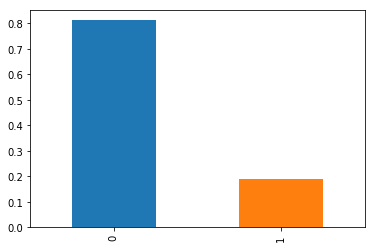

In [14]:
target_pcts = df_X.in_cart.value_counts(normalize=True)  # gives proporations of data that correspond to each class
print(target_pcts) #can already see imbalance #normal will turn into a proporation instead of a value

target_pcts.plot(kind='bar')

/home/ubuntu/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ubuntu/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/ubuntu/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/ubuntu/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

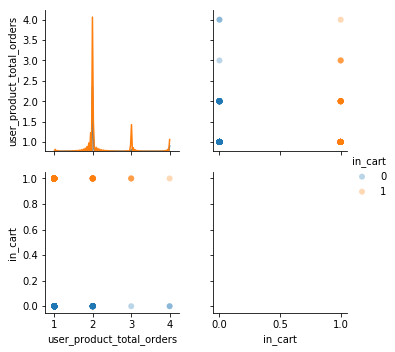

In [15]:
def plot_features(df, sample_size=500):
    
    sample = (df.drop(['product_id','user_id','latest_cart'],axis=1)
                .sample(1000, random_state=44)) 
    sns.pairplot(sample,hue='in_cart', plot_kws=dict(alpha=.3, edgecolor='none'))

plot_features(df_X)

In [16]:

def get_user_split_data(df, test_size=.2, seed=42):

    rs = np.random.RandomState(seed)
    
    total_users = df['user_id'].unique() 
    test_users = rs.choice(total_users, 
                           size=int(total_users.shape[0] * test_size), 
                           replace=False)

    df_tr = df[~df['user_id'].isin(test_users)]
    df_te = df[df['user_id'].isin(test_users)] 

    y_tr, y_te = df_tr['in_cart'], df_te['in_cart']
    X_tr = df_tr.drop(['product_id','user_id','latest_cart','in_cart'],axis=1) 
    X_te = df_te.drop(['product_id','user_id','latest_cart','in_cart'],axis=1)

    return X_tr, X_te, y_tr, y_te

In [17]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_X)

lr = LogisticRegression(solver='lbfgs') #solver parameter , gradient descent that runs the logistic regression model 
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

0.011002601390251183

In [18]:
lr.coef_ #higher number of past product orders is associated with higher likelihood of being in the next cart.

array([[0.75918306]])

In [ ]:
#product level features

In [19]:
prod_features = ['product_total_orders','product_avg_add_to_cart_order']

df_prod_features = (df_orderproductsprior.groupby(['product_id'],as_index=False)
                                           .agg(OrderedDict(
                                                   [('order_id','nunique'),
                                                    ('add_to_cart_order','mean')])))
df_prod_features.columns = ['product_id'] + prod_features
df_prod_features.head()

,product_id,product_total_orders,product_avg_add_to_cart_order
0,1,47,6.255319
1,2,4,11.250000
2,3,5,4.000000
3,4,16,10.687500
4,8,5,13.200000


In [20]:
df_X = df_X.merge(df_prod_features, on='product_id')

df_X.head()

,product_id,user_id,user_product_total_orders,latest_cart,in_cart,product_total_orders,product_avg_add_to_cart_order
0,1,1494,1,{44560},0,47,6.255319
1,1,1540,1,"{37600, 1, 11266, 3298, 130, 30720, 10310, 401...",1,47,6.255319
2,1,3904,1,"{6184, 20818, 21572, 32478}",0,47,6.255319
3,1,15182,1,"{1, 4210, 30731, 19511}",1,47,6.255319
4,1,26613,1,"{21288, 3265, 11759}",0,47,6.255319


In [21]:
df_X.count()

product_id                       606292
user_id                          606292
user_product_total_orders        606292
latest_cart                      606292
in_cart                          606292
product_total_orders             606292
product_avg_add_to_cart_order    606292
dtype: int64

/home/ubuntu/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ubuntu/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/ubuntu/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/ubuntu/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

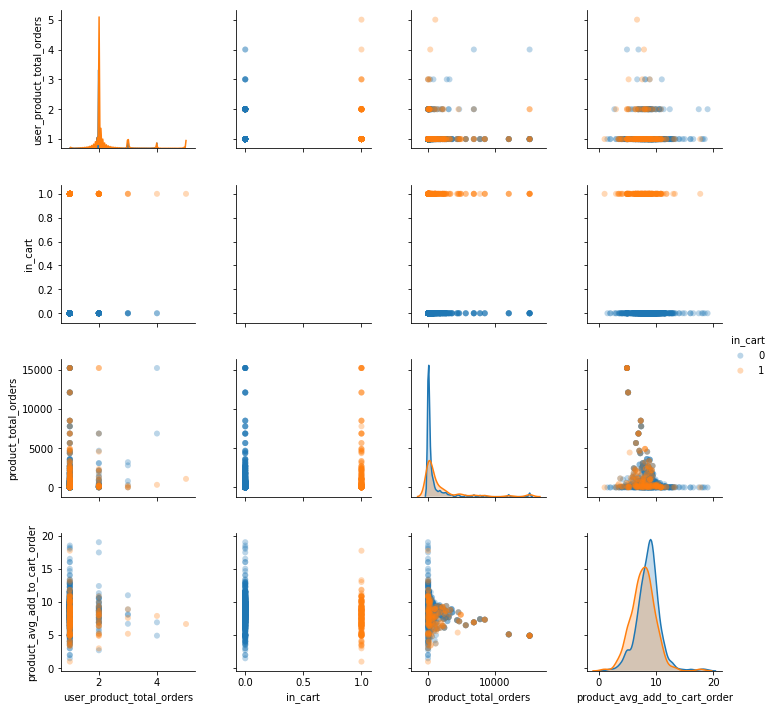

In [22]:
plot_features(df_X)

In [23]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_X)

lr = LogisticRegression()
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.09238352679281285

In [24]:
user_features = ['user_total_orders','user_avg_cartsize','user_total_products','user_avg_days_since_prior_order']

df_user_features = (df_orderproductsprior.groupby(['user_id'],as_index=False) #lambda#rows/#orders for that user 
                                           .agg(OrderedDict(#shape 0, total number of orders they ever ordered
                                                   [('order_id',['nunique', (lambda x: x.shape[0] / x.nunique())]),
                                                    ('product_id','nunique'), #nunique - orders
                                                    ('days_since_prior_order','mean')])))

df_user_features.columns = ['user_id'] + user_features
df_user_features.head()

,user_id,user_total_orders,user_avg_cartsize,user_total_products,user_avg_days_since_prior_order
0,5,1,12.0,12,19.0
1,7,1,24.0,24,30.0
2,15,1,5.0,5,14.0
3,20,1,4.0,4,2.0
4,21,1,4.0,4,14.0


In [25]:
df_X = df_X.merge(df_user_features, on='user_id')
df_X = df_X.dropna() # note that this is naive NaN handling for simplicity
df_X.head(1)

,product_id,user_id,user_product_total_orders,latest_cart,in_cart,product_total_orders,product_avg_add_to_cart_order,user_total_orders,user_avg_cartsize,user_total_products,user_avg_days_since_prior_order
0,1,1494,1,{44560},0,47,6.255319,1,21.0,21,6.0


In [26]:
df_X.count()

product_id                         606292
user_id                            606292
user_product_total_orders          606292
latest_cart                        606292
in_cart                            606292
product_total_orders               606292
product_avg_add_to_cart_order      606292
user_total_orders                  606292
user_avg_cartsize                  606292
user_total_products                606292
user_avg_days_since_prior_order    606292
dtype: int64

In [ ]:
plot_features(df_X)

In [27]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_X)

lr = LogisticRegression(C=1)
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.09272159500360316

In [ ]:
#Here we want to get a sense of how much priority each user places on each product by looking at the 
#typical add_to_cart_order for that user-product combination. 

#We also want to get a feature for % of times a product occurs across all of a user's orders -- 
#we'll do that at the end by taking the original user_product_total_orders feature we grabbed 
#and dividing it by the user_total_orders feature we derived in the user features section.

In [28]:
user_prod_features = ['user_product_avg_add_to_cart_order']

df_user_prod_features = (df_orderproductsprior.groupby(['product_id','user_id'],as_index=False) \
                                                .agg(OrderedDict(
                                                     [('add_to_cart_order','mean')])))

df_user_prod_features.columns = ['product_id','user_id'] + user_prod_features 
df_user_prod_features.head()

,product_id,user_id,user_product_avg_add_to_cart_order
0,1,1494,18.0
1,1,1540,10.0
2,1,3904,2.0
3,1,7981,2.0
4,1,15182,3.0


In [29]:
df_X = df_X.merge(df_user_prod_features,on=['user_id','product_id'])
df_X['user_product_order_freq'] = df_X['user_product_total_orders'] / df_X['user_total_orders'] 
df_X.head(1)

,product_id,user_id,user_product_total_orders,latest_cart,in_cart,product_total_orders,product_avg_add_to_cart_order,user_total_orders,user_avg_cartsize,user_total_products,user_avg_days_since_prior_order,user_product_avg_add_to_cart_order,user_product_order_freq
0,1,1494,1,{44560},0,47,6.255319,1,21.0,21,6.0,18.0,1.0


In [30]:
df_X.count()

product_id                            606292
user_id                               606292
user_product_total_orders             606292
latest_cart                           606292
in_cart                               606292
product_total_orders                  606292
product_avg_add_to_cart_order         606292
user_total_orders                     606292
user_avg_cartsize                     606292
user_total_products                   606292
user_avg_days_since_prior_order       606292
user_product_avg_add_to_cart_order    606292
user_product_order_freq               606292
dtype: int64

In [ ]:
#plot_features(df_X)
#omitted because it slows performance

In [31]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_X)

lr = LogisticRegression(C=1)
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0965952181375484

In [ ]:
#df_X.to_csv('instacart_df_X_features.csv', index=False)

In [ ]:
df_X=pd.read_csv('instacart_df_X_features.csv')

In [32]:
df_X.corr()

,product_id,user_id,user_product_total_orders,in_cart,product_total_orders,product_avg_add_to_cart_order,user_total_orders,user_avg_cartsize,user_total_products,user_avg_days_since_prior_order,user_product_avg_add_to_cart_order,user_product_order_freq
product_id,1.000000,0.000593,-0.000093,-0.000591,0.018828,0.009376,0.001424,0.008015,0.007144,-0.001265,0.002188,-0.001194
user_id,0.000593,1.000000,0.001144,-0.005092,-0.001397,-0.002341,-0.000995,-0.000145,0.001101,0.006294,0.001464,-0.000201
user_product_total_orders,-0.000093,0.001144,1.000000,0.133166,0.086325,-0.091586,0.318166,-0.006671,0.188661,-0.098209,-0.060112,0.054534
in_cart,-0.000591,-0.005092,0.133166,1.000000,0.145909,-0.144004,-0.063888,0.025750,-0.035046,0.019884,-0.078001,0.122847
product_total_orders,0.018828,-0.001397,0.086325,0.145909,1.000000,-0.300661,-0.008546,-0.025775,-0.029414,-0.009605,-0.089902,0.043537
product_avg_add_to_cart_order,0.009376,-0.002341,-0.091586,-0.144004,-0.300661,1.000000,0.016289,0.209820,0.180700,0.001372,0.297273,-0.054419
user_total_orders,0.001424,-0.000995,0.318166,-0.063888,-0.008546,0.016289,1.000000,-0.137521,0.571424,-0.320980,-0.002976,-0.824656
user_avg_cartsize,0.008015,-0.000145,-0.006671,0.025750,-0.025775,0.209820,-0.137521,1.000000,0.646844,0.113946,0.620689,0.148532
user_total_products,0.007144,0.001101,0.188661,-0.035046,-0.029414,0.180700,0.571424,0.646844,1.000000,-0.139248,0.476503,-0.501345
user_avg_days_since_prior_order,-0.001265,0.006294,-0.098209,0.019884,-0.009605,0.001372,-0.320980,0.113946,-0.139248,1.000000,0.044733,0.306244


In [33]:
df_X.count()

product_id                            606292
user_id                               606292
user_product_total_orders             606292
latest_cart                           606292
in_cart                               606292
product_total_orders                  606292
product_avg_add_to_cart_order         606292
user_total_orders                     606292
user_avg_cartsize                     606292
user_total_products                   606292
user_avg_days_since_prior_order       606292
user_product_avg_add_to_cart_order    606292
user_product_order_freq               606292
dtype: int64

In [ ]:
#add product category and aisle information as features

prod_aisle = ['product_aisle']

#aisle table join product table on product id

df_prod_features = (df_orderproductsprior1.groupby(['product_id'],as_index=False)
                                           .agg(OrderedDict(
                                                   [('order_id','nunique'),
                                                    ('add_to_cart_order','mean')])))
df_prod_features.columns = ['product_id'] + prod_features
df_prod_features.head()

In [34]:
df_X = df_X.merge(productsdf.drop('product_name', axis=1),on=['product_id'])

In [35]:
df_X.count()

product_id                            606292
user_id                               606292
user_product_total_orders             606292
latest_cart                           606292
in_cart                               606292
product_total_orders                  606292
product_avg_add_to_cart_order         606292
user_total_orders                     606292
user_avg_cartsize                     606292
user_total_products                   606292
user_avg_days_since_prior_order       606292
user_product_avg_add_to_cart_order    606292
user_product_order_freq               606292
aisle_id                              606292
department_id                         606292
dtype: int64

In [ ]:
#df_X.drop(columns=['aisle_id'],inplace=True)

In [36]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606292 entries, 0 to 606291
Data columns (total 15 columns):
product_id                            606292 non-null int64
user_id                               606292 non-null int64
user_product_total_orders             606292 non-null int64
latest_cart                           606292 non-null object
in_cart                               606292 non-null int64
product_total_orders                  606292 non-null int64
product_avg_add_to_cart_order         606292 non-null float64
user_total_orders                     606292 non-null int64
user_avg_cartsize                     606292 non-null float64
user_total_products                   606292 non-null int64
user_avg_days_since_prior_order       606292 non-null float64
user_product_avg_add_to_cart_order    606292 non-null float64
user_product_order_freq               606292 non-null float64
aisle_id                              606292 non-null int64
department_id                         

In [37]:
df_X=df_X.join(pd.get_dummies(df_X['department_id']))

In [38]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606292 entries, 0 to 606291
Data columns (total 36 columns):
product_id                            606292 non-null int64
user_id                               606292 non-null int64
user_product_total_orders             606292 non-null int64
latest_cart                           606292 non-null object
in_cart                               606292 non-null int64
product_total_orders                  606292 non-null int64
product_avg_add_to_cart_order         606292 non-null float64
user_total_orders                     606292 non-null int64
user_avg_cartsize                     606292 non-null float64
user_total_products                   606292 non-null int64
user_avg_days_since_prior_order       606292 non-null float64
user_product_avg_add_to_cart_order    606292 non-null float64
user_product_order_freq               606292 non-null float64
aisle_id                              606292 non-null int64
department_id                         

In [ ]:
#df_X.drop(columns=['department_id'],inplace=True)

In [39]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606292 entries, 0 to 606291
Data columns (total 36 columns):
product_id                            606292 non-null int64
user_id                               606292 non-null int64
user_product_total_orders             606292 non-null int64
latest_cart                           606292 non-null object
in_cart                               606292 non-null int64
product_total_orders                  606292 non-null int64
product_avg_add_to_cart_order         606292 non-null float64
user_total_orders                     606292 non-null int64
user_avg_cartsize                     606292 non-null float64
user_total_products                   606292 non-null int64
user_avg_days_since_prior_order       606292 non-null float64
user_product_avg_add_to_cart_order    606292 non-null float64
user_product_order_freq               606292 non-null float64
aisle_id                              606292 non-null int64
department_id                         

In [40]:

def get_user_split_data1(df, test_size=.2, seed=42):

    rs = np.random.RandomState(seed)
    
    total_users = df['user_id'].unique() 
    test_users = rs.choice(total_users, 
                           size=int(total_users.shape[0] * test_size), 
                           replace=False)

    df_tr = df[~df['user_id'].isin(test_users)]
    df_te = df[df['user_id'].isin(test_users)] 

    y_tr, y_te = df_tr['in_cart'], df_te['in_cart']
    X_tr = df_tr.drop(['product_id','user_id','latest_cart','in_cart','aisle_id','department_id'],axis=1) 
    X_te = df_te.drop(['product_id','user_id','latest_cart','in_cart','aisle_id','department_id'],axis=1)

    return X_tr, X_te, y_tr, y_te

In [41]:
X_tr, X_te, y_tr, y_te = get_user_split_data1(df_X)

lr = LogisticRegression(C=1)
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.09671010807374444

In [42]:
lr.coef_ 

array([[ 9.91381687e-01,  7.24404063e-05, -1.08820980e-01,
        -2.78030830e-01,  3.49086317e-02, -6.92132214e-03,
        -8.45205875e-04, -3.52460892e-02, -2.35265446e-01,
         4.16662696e-02, -5.59641721e-02,  2.51875810e-01,
         1.07923005e-01, -1.42002955e-01, -1.81140239e-01,
         3.26076374e-01, -4.99892967e-03, -1.95682176e-01,
         5.29732231e-03, -5.33978001e-01, -7.51344490e-02,
        -8.07310008e-01,  4.40451524e-02, -2.44999171e-01,
         2.81650232e-01, -4.62066853e-01,  7.62989308e-02,
         1.06087994e-01,  2.02462829e-01,  1.95486985e-02]])

In [ ]:
# We haven't used the data on order time / day of week at all yet. We could use this to measure the typical times 
# products tend to be ordered (both generically and at the user-product level), and quantify the difference
# between the time of the latest order and these typical times to pick up new signal around ordering patterns.

# Modify the product and user-product features to compute average hour of day and day of week. Add these to df_X,
# Then add features of the form user_product_avg_hod_delta that take the dif of the current order time and the avg.

In [43]:
user_prod_features1 = ['user_product_avg_hour_of_day','user_product_avg_dow']

df_user_prod_features1 = (df_orderproductsprior.groupby(['product_id','user_id'],as_index=False) \
                                                .agg(OrderedDict(
                                                     [('order_hour_of_day','mean'),
                                                     ('order_dow','mean')])))

df_user_prod_features1.columns = ['product_id','user_id'] + user_prod_features1 
df_user_prod_features1.head(10)

,product_id,user_id,user_product_avg_hour_of_day,user_product_avg_dow
0,1,1494,8.0,2.0
1,1,1540,0.0,2.0
2,1,3904,14.0,1.0
3,1,7981,16.0,3.0
4,1,15182,19.0,1.0
5,1,23234,15.0,4.0
6,1,26613,12.0,6.0
7,1,30310,10.0,0.0
8,1,36640,18.0,3.0
9,1,37613,15.0,5.0


In [44]:
df_user_prod_features1.count()

product_id                      956278
user_id                         956278
user_product_avg_hour_of_day    956278
user_product_avg_dow            956278
dtype: int64

In [45]:
df_X = pd.merge(df_X, df_user_prod_features1,on=['user_id','product_id'], how='left')

In [46]:
df_X.head()

,product_id,user_id,user_product_total_orders,latest_cart,in_cart,product_total_orders,product_avg_add_to_cart_order,user_total_orders,user_avg_cartsize,user_total_products,...,14,15,16,17,18,19,20,21,user_product_avg_hour_of_day,user_product_avg_dow
0,1,1494,1,{44560},0,47,6.255319,1,21.0,21,...,0,0,0,0,0,1,0,0,8.0,2.0
1,1,1540,1,"{37600, 1, 11266, 3298, 130, 30720, 10310, 401...",1,47,6.255319,2,10.0,13,...,0,0,0,0,0,1,0,0,0.0,2.0
2,1,3904,1,"{6184, 20818, 21572, 32478}",0,47,6.255319,1,3.0,3,...,0,0,0,0,0,1,0,0,14.0,1.0
3,1,15182,1,"{1, 4210, 30731, 19511}",1,47,6.255319,2,2.5,3,...,0,0,0,0,0,1,0,0,19.0,1.0
4,1,26613,1,"{21288, 3265, 11759}",0,47,6.255319,2,3.5,7,...,0,0,0,0,0,1,0,0,12.0,6.0


In [47]:
df_X.count()

product_id                            606292
user_id                               606292
user_product_total_orders             606292
latest_cart                           606292
in_cart                               606292
product_total_orders                  606292
product_avg_add_to_cart_order         606292
user_total_orders                     606292
user_avg_cartsize                     606292
user_total_products                   606292
user_avg_days_since_prior_order       606292
user_product_avg_add_to_cart_order    606292
user_product_order_freq               606292
aisle_id                              606292
department_id                         606292
1                                     606292
2                                     606292
3                                     606292
4                                     606292
5                                     606292
6                                     606292
7                                     606292
8         

In [48]:
X_tr, X_te, y_tr, y_te = get_user_split_data1(df_X)

lr = LogisticRegression(C=1)
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.09535559358459028

In [49]:
lr.coef_ 

array([[ 9.26103610e-01,  7.11631898e-05, -1.21929677e-01,
        -2.73867622e-01,  3.26187077e-02, -5.25784379e-03,
        -1.82611527e-03, -3.51170091e-02, -1.65344208e-01,
         4.70695926e-02, -4.77663520e-02,  2.30818269e-01,
         8.72163100e-02, -1.16985002e-01, -1.56747902e-01,
         2.84285788e-01, -8.37663401e-05, -1.67412958e-01,
         5.25260429e-03, -4.65724035e-01, -6.19171071e-02,
        -7.36876506e-01,  4.40399768e-02, -2.12390256e-01,
         2.80763612e-01, -4.07188650e-01,  7.04232117e-02,
         1.10169410e-01,  1.88872537e-01,  1.81871314e-02,
        -5.85531443e-03, -6.54546303e-03]])

In [ ]:
#most recent order dow and hour of day by user/product

In [50]:
user_prod_features2 = ['most_recent_order_no']

df_user_prod_features2 = (df_orderproductstrain.groupby(['product_id','user_id','order_dow','order_hour_of_day'],as_index=False) \
                                                .agg(OrderedDict(
                                                     [('order_id','max')])))

df_user_prod_features2.columns = ['product_id','user_id','most_recent_order_dow','most_recent_order_hour_of_day'] + user_prod_features2 
df_user_prod_features2.head(10)

,product_id,user_id,most_recent_order_dow,most_recent_order_hour_of_day,most_recent_order_no
0,1,751,2,6,63770
1,1,1540,1,1,6695
2,1,2221,5,19,767323
3,1,9694,4,11,304053
4,1,13916,3,9,1028477
5,1,14910,5,11,468768
6,1,15182,0,17,1372137
7,1,21054,3,14,253400
8,1,21395,5,22,2628526
9,1,21910,1,18,3044039


In [51]:
df_X = pd.merge(df_X, df_user_prod_features2[['product_id','user_id','most_recent_order_dow','most_recent_order_hour_of_day']],on=['user_id','product_id'], how='left')

In [52]:
df_X.head(1)

,product_id,user_id,user_product_total_orders,latest_cart,in_cart,product_total_orders,product_avg_add_to_cart_order,user_total_orders,user_avg_cartsize,user_total_products,...,16,17,18,19,20,21,user_product_avg_hour_of_day,user_product_avg_dow,most_recent_order_dow,most_recent_order_hour_of_day
0,1,1494,1,{44560},0,47,6.255319,1,21.0,21,...,0,0,0,1,0,0,8.0,2.0,NaN,NaN


In [53]:
df_X.count()

product_id                            606292
user_id                               606292
user_product_total_orders             606292
latest_cart                           606292
in_cart                               606292
product_total_orders                  606292
product_avg_add_to_cart_order         606292
user_total_orders                     606292
user_avg_cartsize                     606292
user_total_products                   606292
user_avg_days_since_prior_order       606292
user_product_avg_add_to_cart_order    606292
user_product_order_freq               606292
aisle_id                              606292
department_id                         606292
1                                     606292
2                                     606292
3                                     606292
4                                     606292
5                                     606292
6                                     606292
7                                     606292
8         

In [54]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606292 entries, 0 to 606291
Data columns (total 40 columns):
product_id                            606292 non-null int64
user_id                               606292 non-null int64
user_product_total_orders             606292 non-null int64
latest_cart                           606292 non-null object
in_cart                               606292 non-null int64
product_total_orders                  606292 non-null int64
product_avg_add_to_cart_order         606292 non-null float64
user_total_orders                     606292 non-null int64
user_avg_cartsize                     606292 non-null float64
user_total_products                   606292 non-null int64
user_avg_days_since_prior_order       606292 non-null float64
user_product_avg_add_to_cart_order    606292 non-null float64
user_product_order_freq               606292 non-null float64
aisle_id                              606292 non-null int64
department_id                         

In [ ]:
#replace nan with mean of column 

In [ ]:
#df_X=df_X.replace("?",np.nan)
#df_X['most_recent_order_dow'].fillna(df_X['most_recent_order_dow'].mean(), inplace=True)

In [ ]:
#df_X['most_recent_order_hour_of_day'].fillna(df_X['most_recent_order_hour_of_day'].mean(), inplace=True)

In [55]:
df_X['most_recent_order_dow'].fillna(-9999, inplace=True)

In [56]:
df_X['most_recent_order_hour_of_day'].fillna(-9999, inplace=True)

In [57]:
df_X.head()

,product_id,user_id,user_product_total_orders,latest_cart,in_cart,product_total_orders,product_avg_add_to_cart_order,user_total_orders,user_avg_cartsize,user_total_products,...,16,17,18,19,20,21,user_product_avg_hour_of_day,user_product_avg_dow,most_recent_order_dow,most_recent_order_hour_of_day
0,1,1494,1,{44560},0,47,6.255319,1,21.0,21,...,0,0,0,1,0,0,8.0,2.0,-9999.0,-9999.0
1,1,1540,1,"{37600, 1, 11266, 3298, 130, 30720, 10310, 401...",1,47,6.255319,2,10.0,13,...,0,0,0,1,0,0,0.0,2.0,1.0,1.0
2,1,3904,1,"{6184, 20818, 21572, 32478}",0,47,6.255319,1,3.0,3,...,0,0,0,1,0,0,14.0,1.0,-9999.0,-9999.0
3,1,15182,1,"{1, 4210, 30731, 19511}",1,47,6.255319,2,2.5,3,...,0,0,0,1,0,0,19.0,1.0,0.0,17.0
4,1,26613,1,"{21288, 3265, 11759}",0,47,6.255319,2,3.5,7,...,0,0,0,1,0,0,12.0,6.0,-9999.0,-9999.0


In [58]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606292 entries, 0 to 606291
Data columns (total 40 columns):
product_id                            606292 non-null int64
user_id                               606292 non-null int64
user_product_total_orders             606292 non-null int64
latest_cart                           606292 non-null object
in_cart                               606292 non-null int64
product_total_orders                  606292 non-null int64
product_avg_add_to_cart_order         606292 non-null float64
user_total_orders                     606292 non-null int64
user_avg_cartsize                     606292 non-null float64
user_total_products                   606292 non-null int64
user_avg_days_since_prior_order       606292 non-null float64
user_product_avg_add_to_cart_order    606292 non-null float64
user_product_order_freq               606292 non-null float64
aisle_id                              606292 non-null int64
department_id                         

In [59]:
X_tr, X_te, y_tr, y_te = get_user_split_data1(df_X)

lr = LogisticRegression(C=1)
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

In [60]:
lr.coef_ 

array([[2.48080284e-03, 5.00554043e-02, 1.76389470e-02, 3.52081393e-03,
        2.84723981e-02, 3.96122182e-02, 2.77035999e-02, 1.43651137e-02,
        1.79064307e-03, 2.40863374e-04, 5.64018574e-06, 1.22161228e-04,
        9.95976143e-05, 3.19380336e-05, 2.69888906e-05, 3.12337918e-04,
        3.86463598e-05, 6.68603073e-05, 3.21454263e-06, 6.12130560e-05,
        4.49673788e-05, 1.06194928e-04, 7.60818090e-05, 7.28784055e-05,
        3.02279661e-04, 7.34744373e-05, 4.59850097e-05, 3.27639752e-04,
        8.98546426e-05, 1.91686430e-05, 2.88192794e-02, 6.09103878e-03,
        2.74772201e-02, 4.98963398e-02]])

In [61]:
df_X['user_product_avg_hod_delta'] = df_X['most_recent_order_hour_of_day'] - df_X['user_product_avg_hour_of_day'] 

In [62]:
df_X['user_product_avg_hod_delta']=df_X['user_product_avg_hod_delta'].abs()

In [63]:
df_X['user_product_avg_hod_delta'].value_counts()

10009.000000    40963
10010.000000    40581
10014.000000    40159
10011.000000    40109
10012.000000    39221
10013.000000    39220
10015.000000    37416
10008.000000    35072
10016.000000    30865
10007.000000    24636
10017.000000    24039
1.000000        18024
10018.000000    17971
2.000000        14848
10019.000000    14370
10006.000000    12735
3.000000        12164
10020.000000    11091
0.000000        10539
4.000000        10121
10021.000000     9137
5.000000         8389
6.000000         7094
10022.000000     5798
7.000000         5617
8.000000         4574
10005.000000     4056
9.000000         3496
9999.000000      2888
10.000000        2792
                ...  
12.666667           1
13.750000           1
2.833333            1
3.166667            1
10019.750000        1
2.200000            1
10019.250000        1
2.200000            1
0.714286            1
3.714286            1
19.333333           1
10015.833333        1
13.333333           1
10014.166667        1
4.166667  

In [64]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606292 entries, 0 to 606291
Data columns (total 41 columns):
product_id                            606292 non-null int64
user_id                               606292 non-null int64
user_product_total_orders             606292 non-null int64
latest_cart                           606292 non-null object
in_cart                               606292 non-null int64
product_total_orders                  606292 non-null int64
product_avg_add_to_cart_order         606292 non-null float64
user_total_orders                     606292 non-null int64
user_avg_cartsize                     606292 non-null float64
user_total_products                   606292 non-null int64
user_avg_days_since_prior_order       606292 non-null float64
user_product_avg_add_to_cart_order    606292 non-null float64
user_product_order_freq               606292 non-null float64
aisle_id                              606292 non-null int64
department_id                         

In [65]:
X_tr, X_te, y_tr, y_te = get_user_split_data1(df_X)

lr = LogisticRegression(C=1)
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

In [66]:
lr.coef_ 

array([[ 1.99845962e-03,  3.28684062e-02,  1.39541148e-02,
         2.77876798e-03,  2.02852854e-02,  2.74538638e-02,
         2.16577861e-02,  1.02054784e-02,  1.47928021e-03,
         1.95397551e-04,  6.02599917e-06,  9.45371052e-05,
         7.05135712e-05,  3.26400303e-05,  2.35330311e-05,
         2.63925038e-04,  3.90504453e-05,  5.46746918e-05,
         2.86143968e-06,  6.34006580e-05,  3.53017578e-05,
         9.05904135e-05,  5.87688953e-05,  5.93330402e-05,
         2.21012265e-04,  6.44421769e-05,  3.43870520e-05,
         2.69466720e-04,  7.00169701e-05,  1.84395162e-05,
         2.33234042e-02,  5.00592540e-03,  1.51766898e-02,
         3.31389750e-02, -2.85536600e-03]])

In [67]:
X_tr, X_te, y_tr, y_te = get_user_split_data1(df_X)
scaler = StandardScaler() #scales and brings it down to between 0 and 1, a quick transformation 
X_train_scaled = scaler.fit_transform(X_tr)
X_test_scaled = scaler.transform(X_te)

/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


In [ ]:
#adding user prod avg hod delta drops the F1 score, so we will remove for now

In [ ]:
#Handling class imbalance

In [68]:
lr = LogisticRegression(solver='liblinear') 
lr_balanced = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_4x = LogisticRegression(class_weight={1 : 4, 0 : 1}, solver='liblinear')

lr.fit(X_train_scaled, y_tr)
print('Normal Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_te, lr.predict(X_test_scaled)), roc_auc_score(y_te, lr.predict_proba(X_test_scaled)[:,1])))

lr_balanced.fit(X_train_scaled, y_tr)
print('Balanced class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_te, lr_balanced.predict(X_test_scaled)), roc_auc_score(y_te, lr_balanced.predict_proba(X_test_scaled)[:,1])))

lr_4x.fit(X_train_scaled, y_tr)
print('3:1 class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_te, lr_4x.predict(X_test_scaled)), roc_auc_score(y_te, lr_4x.predict_proba(X_test_scaled)[:,1])))

Normal Logistic Regression Test F1: 1.000, Test AUC: 1.000
Balanced class weights Logistic Regression Test F1: 1.000, Test AUC: 1.000
3:1 class weights Logistic Regression Test F1: 1.000, Test AUC: 1.000


In [69]:
from sklearn import metrics
print("Precision:",metrics.precision_score(y_te, lr_4x.predict(X_test_scaled))) # 48/51
print("Recall:",metrics.recall_score(y_te, lr_4x.predict(X_test_scaled)))#48/54

Precision: 1.0
Recall: 1.0


In [70]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_te, lr_4x.predict_proba(X_test_scaled)[:,1])

ROC AUC score =  1.0


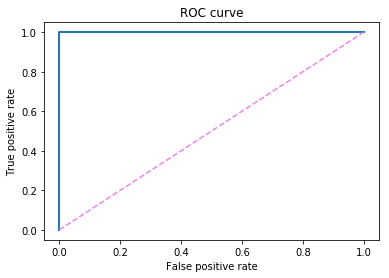

In [71]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_te, lr_4x.predict_proba(X_test_scaled)[:,1]))

In [72]:
df_X.head()

,product_id,user_id,user_product_total_orders,latest_cart,in_cart,product_total_orders,product_avg_add_to_cart_order,user_total_orders,user_avg_cartsize,user_total_products,...,17,18,19,20,21,user_product_avg_hour_of_day,user_product_avg_dow,most_recent_order_dow,most_recent_order_hour_of_day,user_product_avg_hod_delta
0,1,1494,1,{44560},0,47,6.255319,1,21.0,21,...,0,0,1,0,0,8.0,2.0,-9999.0,-9999.0,10007.0
1,1,1540,1,"{37600, 1, 11266, 3298, 130, 30720, 10310, 401...",1,47,6.255319,2,10.0,13,...,0,0,1,0,0,0.0,2.0,1.0,1.0,1.0
2,1,3904,1,"{6184, 20818, 21572, 32478}",0,47,6.255319,1,3.0,3,...,0,0,1,0,0,14.0,1.0,-9999.0,-9999.0,10013.0
3,1,15182,1,"{1, 4210, 30731, 19511}",1,47,6.255319,2,2.5,3,...,0,0,1,0,0,19.0,1.0,0.0,17.0,2.0
4,1,26613,1,"{21288, 3265, 11759}",0,47,6.255319,2,3.5,7,...,0,0,1,0,0,12.0,6.0,-9999.0,-9999.0,10011.0


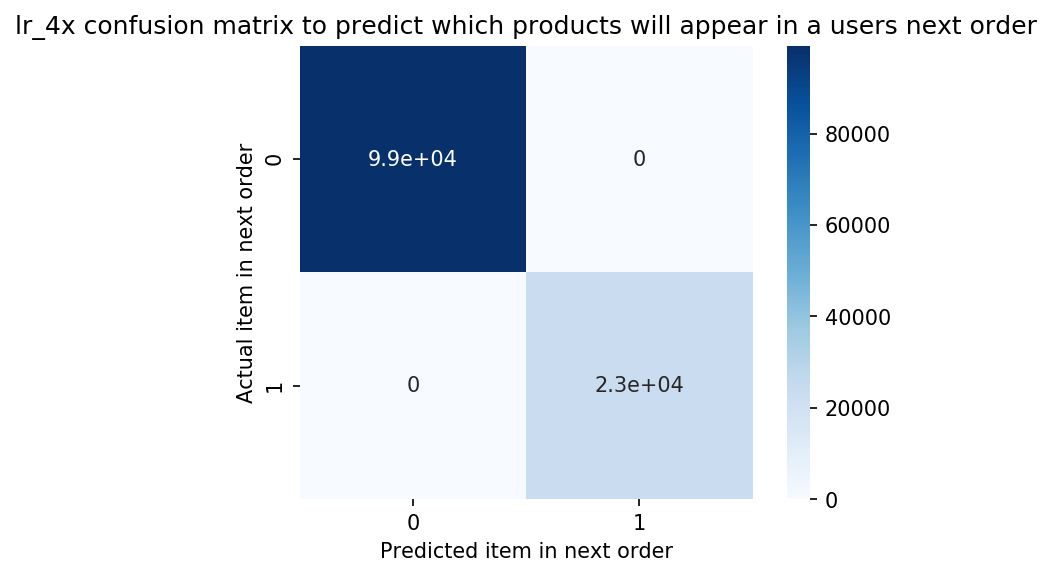

In [73]:
lr_4x_confusion = confusion_matrix(y_te, lr_4x.predict(X_test_scaled))
plt.figure(dpi=150)
sns.heatmap(lr_4x_confusion, cmap=plt.cm.Blues, annot=True, square=True)
         #  xticklabels=iris_dataset['target_names'],
          # yticklabels=iris_dataset['target_names)

plt.xlabel('Predicted item in next order')
plt.ylabel('Actual item in next order')
plt.title('lr_4x confusion matrix to predict which products will appear in a users next order');    


In [ ]:
# Add another user-product feature that computes how many orders it's been since the user ordered that product 

In [74]:
##########
user_prod_features3=['user_most_recent_orderno_withprod']

df_user_prod_features3 = (df_orderproductsprior.groupby(['product_id','user_id'],as_index=False) 
                                          .agg(OrderedDict(
                                                   [('order_id','max')])))
df_user_prod_features3.columns = ['product_id','user_id'] + user_prod_features3 

product_ids = df_orderproductstrain['product_id'].unique()


In [75]:
df_user_prod_features3.head(10)

,product_id,user_id,user_most_recent_orderno_withprod
0,1,1494,186761
1,1,1540,200390
2,1,3904,207661
3,1,7981,138748
4,1,15182,153011
5,1,23234,172436
6,1,26613,130646
7,1,30310,127530
8,1,36640,133612
9,1,37613,161433


In [76]:
df_user_prod_features3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956278 entries, 0 to 956277
Data columns (total 3 columns):
product_id                           956278 non-null int64
user_id                              956278 non-null int64
user_most_recent_orderno_withprod    956278 non-null int64
dtypes: int64(3)
memory usage: 29.2 MB


In [77]:
#get a list of users orders

In [78]:
order_group = (df_orderproductsprior.groupby(['user_id','product_id'],as_index=False) #more recent set of orders 
                                      .agg({'order_id':(lambda x: set(x))})#product of items, set so no dups
                                      .rename(columns={'order_id':'list_orders'}))

                                           

In [79]:
order_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956278 entries, 0 to 956277
Data columns (total 3 columns):
user_id        956278 non-null int64
product_id     956278 non-null int64
list_orders    956278 non-null object
dtypes: int64(2), object(1)
memory usage: 29.2+ MB


In [ ]:
#omit for now
#order_group['list_orders'] = order_group['list_orders'].map(lambda x: list(sorted(x)))

In [80]:
order_group = pd.merge(order_group, df_user_prod_features3,on=['user_id','product_id'], how='inner')

In [81]:
# Add another user-product feature that computes how many orders it's been since the user ordered that product 

In [82]:
order_group.head(30)

,user_id,product_id,list_orders,user_most_recent_orderno_withprod
0,5,3376,{157374},157374
1,5,5999,{157374},157374
2,5,8518,{157374},157374
3,5,11777,{157374},157374
4,5,13988,{157374},157374
5,5,16168,{157374},157374
6,5,21413,{157374},157374
7,5,24535,{157374},157374
8,5,26604,{157374},157374
9,5,27344,{157374},157374


In [83]:
order_group_all_orders = (df_orderproductsprior.groupby(['user_id'],as_index=False) #more recent set of orders 
                                      .agg({'order_id':(lambda x: set(x))})#product of items, set so no dups
                                      .rename(columns={'order_id':'all_users_orders'}))

                                           

In [84]:
order_group_all_orders['all_users_orders'] = order_group_all_orders['all_users_orders'].map(lambda x: list(sorted(x)))

In [85]:
order_group_all_orders.head(25)

,user_id,all_users_orders
0,5,[157374]
1,7,[121053]
2,15,[113728]
3,20,[157550]
4,21,[129152]
5,22,"[144358, 194741]"
6,24,"[118133, 173172, 196008]"
7,26,[135696]
8,27,[129025]
9,28,[181977]


In [86]:
order_group2 = pd.merge(order_group, order_group_all_orders,on=['user_id'], how='left')

In [87]:
order_group2.tail(10)

,user_id,product_id,list_orders,user_most_recent_orderno_withprod,all_users_orders
956268,206208,39966,{183408},183408,"[126826, 167903, 183408]"
956269,206208,42110,{183408},183408,"[126826, 167903, 183408]"
956270,206208,43295,{126826},126826,"[126826, 167903, 183408]"
956271,206208,44359,{183408},183408,"[126826, 167903, 183408]"
956272,206208,44532,{167903},167903,"[126826, 167903, 183408]"
956273,206208,44750,{167903},167903,"[126826, 167903, 183408]"
956274,206208,45264,{183408},183408,"[126826, 167903, 183408]"
956275,206208,47008,{167903},167903,"[126826, 167903, 183408]"
956276,206208,48017,{167903},167903,"[126826, 167903, 183408]"
956277,206208,49385,{183408},183408,"[126826, 167903, 183408]"


In [88]:
order_group2.drop(columns=['list_orders'],inplace=True)

In [89]:
order_group2.head()

,user_id,product_id,user_most_recent_orderno_withprod,all_users_orders
0,5,3376,157374,[157374]
1,5,5999,157374,[157374]
2,5,8518,157374,[157374]
3,5,11777,157374,[157374]
4,5,13988,157374,[157374]


In [ ]:
#order_group_all_orders['all_users_orders'] = order_group_all_orders['all_users_orders'].map(lambda x: list(sorted(x)))

In [ ]:
#order_group2['index']=order_group2['all_users_orders'].map(lambda x: x.index(order_group2['user_most_recent_orderno_withprod']))

In [90]:
order_group2['position_of_most_recent_order_cont_prod'] = order_group2.loc[:, ('user_most_recent_orderno_withprod', 'all_users_orders')].apply(lambda x: x[1].index(x[0]), axis=1)

In [91]:
order_group2['position_of_most_recent_order_cont_prod']=order_group2['position_of_most_recent_order_cont_prod']+1

In [92]:
order_group2.head(40)

,user_id,product_id,user_most_recent_orderno_withprod,all_users_orders,position_of_most_recent_order_cont_prod
0,5,3376,157374,[157374],1
1,5,5999,157374,[157374],1
2,5,8518,157374,[157374],1
3,5,11777,157374,[157374],1
4,5,13988,157374,[157374],1
5,5,16168,157374,[157374],1
6,5,21413,157374,[157374],1
7,5,24535,157374,[157374],1
8,5,26604,157374,[157374],1
9,5,27344,157374,[157374],1


In [93]:
order_group2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956278 entries, 0 to 956277
Data columns (total 5 columns):
user_id                                    956278 non-null int64
product_id                                 956278 non-null int64
user_most_recent_orderno_withprod          956278 non-null int64
all_users_orders                           956278 non-null object
position_of_most_recent_order_cont_prod    956278 non-null int64
dtypes: int64(4), object(1)
memory usage: 43.8+ MB


In [94]:
df_X = pd.merge(df_X,order_group2, on=['user_id','product_id'], how='left')

In [95]:
df_X.head()

,product_id,user_id,user_product_total_orders,latest_cart,in_cart,product_total_orders,product_avg_add_to_cart_order,user_total_orders,user_avg_cartsize,user_total_products,...,20,21,user_product_avg_hour_of_day,user_product_avg_dow,most_recent_order_dow,most_recent_order_hour_of_day,user_product_avg_hod_delta,user_most_recent_orderno_withprod,all_users_orders,position_of_most_recent_order_cont_prod
0,1,1494,1,{44560},0,47,6.255319,1,21.0,21,...,0,0,8.0,2.0,-9999.0,-9999.0,10007.0,186761,[186761],1
1,1,1540,1,"{37600, 1, 11266, 3298, 130, 30720, 10310, 401...",1,47,6.255319,2,10.0,13,...,0,0,0.0,2.0,1.0,1.0,1.0,200390,"[133972, 200390]",2
2,1,3904,1,"{6184, 20818, 21572, 32478}",0,47,6.255319,1,3.0,3,...,0,0,14.0,1.0,-9999.0,-9999.0,10013.0,207661,[207661],1
3,1,15182,1,"{1, 4210, 30731, 19511}",1,47,6.255319,2,2.5,3,...,0,0,19.0,1.0,0.0,17.0,2.0,153011,"[153011, 173785]",1
4,1,26613,1,"{21288, 3265, 11759}",0,47,6.255319,2,3.5,7,...,0,0,12.0,6.0,-9999.0,-9999.0,10011.0,130646,"[130646, 182724]",1


In [96]:
df_X['pct_total_orders_contain_prod']=df_X['position_of_most_recent_order_cont_prod']/df_X['user_total_orders']

In [97]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606292 entries, 0 to 606291
Data columns (total 45 columns):
product_id                                 606292 non-null int64
user_id                                    606292 non-null int64
user_product_total_orders                  606292 non-null int64
latest_cart                                606292 non-null object
in_cart                                    606292 non-null int64
product_total_orders                       606292 non-null int64
product_avg_add_to_cart_order              606292 non-null float64
user_total_orders                          606292 non-null int64
user_avg_cartsize                          606292 non-null float64
user_total_products                        606292 non-null int64
user_avg_days_since_prior_order            606292 non-null float64
user_product_avg_add_to_cart_order         606292 non-null float64
user_product_order_freq                    606292 non-null float64
aisle_id                         

In [ ]:
#df_X.drop(columns=['all_users_orders'],inplace=True)

In [ ]:
#df_X.drop(columns=['user_most_recent_orderno_withprod'],inplace=True)

In [98]:
df_X.head()

,product_id,user_id,user_product_total_orders,latest_cart,in_cart,product_total_orders,product_avg_add_to_cart_order,user_total_orders,user_avg_cartsize,user_total_products,...,21,user_product_avg_hour_of_day,user_product_avg_dow,most_recent_order_dow,most_recent_order_hour_of_day,user_product_avg_hod_delta,user_most_recent_orderno_withprod,all_users_orders,position_of_most_recent_order_cont_prod,pct_total_orders_contain_prod
0,1,1494,1,{44560},0,47,6.255319,1,21.0,21,...,0,8.0,2.0,-9999.0,-9999.0,10007.0,186761,[186761],1,1.0
1,1,1540,1,"{37600, 1, 11266, 3298, 130, 30720, 10310, 401...",1,47,6.255319,2,10.0,13,...,0,0.0,2.0,1.0,1.0,1.0,200390,"[133972, 200390]",2,1.0
2,1,3904,1,"{6184, 20818, 21572, 32478}",0,47,6.255319,1,3.0,3,...,0,14.0,1.0,-9999.0,-9999.0,10013.0,207661,[207661],1,1.0
3,1,15182,1,"{1, 4210, 30731, 19511}",1,47,6.255319,2,2.5,3,...,0,19.0,1.0,0.0,17.0,2.0,153011,"[153011, 173785]",1,0.5
4,1,26613,1,"{21288, 3265, 11759}",0,47,6.255319,2,3.5,7,...,0,12.0,6.0,-9999.0,-9999.0,10011.0,130646,"[130646, 182724]",1,0.5


In [99]:
def get_user_split_data2(df, test_size=.2, seed=42):

    rs = np.random.RandomState(seed)
    
    total_users = df['user_id'].unique() 
    test_users = rs.choice(total_users, 
                           size=int(total_users.shape[0] * test_size), 
                           replace=False)

    df_tr = df[~df['user_id'].isin(test_users)]
    df_te = df[df['user_id'].isin(test_users)] 

    y_tr, y_te = df_tr['in_cart'], df_te['in_cart']
    X_tr = df_tr.drop(['product_id','user_id','latest_cart','in_cart','aisle_id','department_id','user_most_recent_orderno_withprod','all_users_orders'],axis=1) 
    X_te = df_te.drop(['product_id','user_id','latest_cart','in_cart','aisle_id','department_id','user_most_recent_orderno_withprod','all_users_orders'],axis=1)

    return X_tr, X_te, y_tr, y_te

In [100]:
X_tr, X_te, y_tr, y_te = get_user_split_data2(df_X)

lr = LogisticRegression(C=1)
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

In [101]:
lr.coef_

array([[ 1.99674963e-03,  3.28152887e-02,  1.39469282e-02,
         2.77557555e-03,  2.02725153e-02,  2.74241360e-02,
         2.16487437e-02,  1.01987490e-02,  1.47879983e-03,
         1.95324314e-04,  6.02606477e-06,  9.44648186e-05,
         7.04456180e-05,  3.26353802e-05,  2.35225922e-05,
         2.63799858e-04,  3.90434834e-05,  5.46525153e-05,
         2.85963461e-06,  6.33958972e-05,  3.52853426e-05,
         9.05517216e-05,  5.87344037e-05,  5.93130458e-05,
         2.20836910e-04,  6.44281032e-05,  3.43657120e-05,
         2.69326759e-04,  6.99775527e-05,  1.84393693e-05,
         2.33115374e-02,  5.00342133e-03,  1.51509515e-02,
         3.31037874e-02, -2.83555146e-03,  2.40309196e-03,
         1.62765200e-03]])

In [102]:
df_X.to_csv('instacart_df_X_features_fnull.csv', index=False)

In [ ]:
##ANALYSIS

In [ ]:
#scaling

In [ ]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_X)
scaler = StandardScaler() #scales and brings it down to between 0 and 1, a quick transformation 
X_train_scaled = scaler.fit_transform(X_tr)
X_test_scaled = scaler.transform(X_te)

In [ ]:
lr = LogisticRegression(C=1)
lr.fit(X_train_scaled, y_tr)
f1_score(y_te, lr.predict(X_test_scaled))

In [ ]:
scores=cross_val_score(lr, X_tr, y_tr, cv=5,scoring='accuracy', n_jobs=-1)

In [ ]:
scores.mean()

In [ ]:
from sklearn.model_selection import cross_val_score

f1 = cross_val_score(lr, 
            X_tr, y_tr, scoring='f1', cv=5)

In [ ]:
f1.mean()

In [ ]:
y_predict = lr.predict(X_train_scaled)  # This is a hard classifier

In [ ]:
lr.score(X_train_scaled,y_tr)
#accuracy

In [ ]:
#L4X (3:1 class weights)
#lr_4x.fit(X_tr, y_tr)

In [ ]:
#lr = LogisticRegression(C=1)
lr_4x.fit(X_train_scaled, y_tr)
f1_score(y_te, lr_4x.predict(X_test_scaled))

In [ ]:
scores1=cross_val_score(lr_4x, X_tr, y_tr, cv=5,scoring='accuracy', n_jobs=-1)

In [ ]:
scores1.mean()

In [ ]:
from sklearn.model_selection import cross_val_score

f1a = cross_val_score(lr_4x, 
            X_tr, y_tr, scoring='f1', cv=5)

In [ ]:
f1a.mean()

In [ ]:
#random forest

In [ ]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)

In [ ]:
rfc

In [ ]:
rfc.fit(X_train_scaled, y_tr)

In [ ]:
rfc.score(X_test_scaled,y_te)

In [ ]:
#stopping point

In [ ]:
df_X = df_X.merge(df_user_prod_features2,on=['user_id','product_id'])

In [ ]:
df_X.head(20)

In [ ]:
df_X['user_product_avg_hod_delta'] = df_X['most_recent_order_hour_of_day'] - df_X['user_product_avg_hour_of_day'] 

In [ ]:
#quantify the difference
# between the time of the latest order and these typical times to pick up new signal around ordering patterns.

In [ ]:
#not correct, need to get hour they bought prod, not the number of times they ordered it
user_prod_features2 = ['user_bought_prod_at_hour_of_day']

df_user_prod_features2 = df_orderproductsprior.groupby(['product_id','user_id'])['order_hour_of_day'].aggregate('count').reset_index()
#df_user_prod_features2.sort_values('product_id', ascending=False)
df_user_prod_features2.columns = ['product_id','user_id'] + user_prod_features2 
df_user_prod_features2.head(10)

In [ ]:
user_prod_features3 = ['user_bought_prod_at_dow']

df_user_prod_features3 = df_orderproductsprior.groupby(['product_id','user_id'])['order_dow'].aggregate('count').reset_index()
#df_user_prod_features2.sort_values('product_id', ascending=False)
df_user_prod_features3.columns = ['product_id','user_id'] + user_prod_features3 
df_user_prod_features3.head(10)

In [ ]:
#Looking at order_products_train 

user_prod_features4 = ['user_bought_prod_at_dow']

df_user_prod_features4 = df_orderproductstrain.groupby(['user_id','product_id','order_dow'])
#df_user_prod_features2.sort_values('product_id', ascending=False)
df_user_prod_features4.columns = ['product_id','user_id','order_dow','order_hour_of_day'] + user_prod_features3 
df_user_prod_features4.head(10)

In [ ]:
prod_features12 = ['latest_order_no']

df_prod_features12 = (df_orderproductsprior.groupby(['product_id'],as_index=False)
                                           .agg(OrderedDict(
                                                   [('order_id','max'),])))
df_prod_features12.columns = ['product_id'] + prod_features12
df_prod_features12.head()

In [ ]:
user_prod_features13 = ['most_recent_order_no']

df_user_prod_features13 = (df_orderproductstrain.groupby(['product_id','user_id','order_dow','order_hour_of_day'],as_index=False) \
                                                .agg(OrderedDict(
                                                     [('order_id','max')])))

df_user_prod_features13.columns = ['product_id','user_id','most_recent_order_dow','most_recent_order_hour_of_day'] + user_prod_features13 
df_user_prod_features13.head(10)

In [ ]:
#merge two dataframes together

In [ ]:
#df_X['user_product_avg_hod_delta'] = df_X['user_order_time'] - df_X['user_avg_time'] 

In [ ]:
# Then add features of the form user_product_avg_hod_delta that take the dif of the current order time and the avg.

In [ ]:
user_prod_features15 = ['user_product_avg_hod_delta']

df_user_prod_features15 = (df_orderproductstrain.groupby(['product_id','user_id','order_dow','order_hour_of_day'],as_index=False) \
                                                .agg(OrderedDict(
                                                     [('order_id','max')])))

df_user_prod_features15.columns = ['product_id','user_id','most_recent_order_dow','most_recent_order_hour_of_day'] + user_prod_features13 
df_user_prod_features15.head(10)

In [ ]:
#generically

In [ ]:
#number orders generally ordered at a specific day of week and hour of day
orderdf1=orderdf.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
orderdf1.sort_values('order_number', ascending=False)

In [ ]:
#per product id
orderdf1=df_orderproductsprior.groupby(["product_id","order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
orderdf1.sort_values('order_number', ascending=False)

In [ ]:
mask = (productsdf['product_id']==24852)
productsdf[mask].head()

In [ ]:
mask = (productsdf['product_id']==13176)
productsdf[mask].head()

In [ ]:
# Add another user-product feature that computes how many orders it's been since the user ordered that product 

In [ ]:
df_test=df_orderproductstrain.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

In [ ]:
df_orderproductstrain.groupby("order_id")["add_to_cart_order"].aggregate("max")

In [ ]:
user_prod_features = ['user_product_no_orders_since_that_prod']

df_user_prod_features1 = (df_orderproductsprior.groupby(['user_id','product_id'],as_index=False) \
                                                .agg('order_id','max'))

df_user_prod_features1.columns = ['product_id','user_id'] + user_prod_features 
df_user_prod_features1.head()